# Iterative Interaction Flux Balance Analysis (iiFBA):
This notebook will walkthrough the process for utilizing the iiFBA extension for cobrapy.

***
## Install Information
### Dependencies
- python $\geq$ 3.8
- cobra $\geq$ 0.27.0
- numpy $\geq$ 1.21
- pandas $\geq$ 1.3
- matplotlib $\geq$ UNKNOWN

### Install
From PyPI:<br>
`pip install iifba`

From Github:<br>
`pip install "git+https://github.com/m-3-lab/iiFBA.git@main#subdirectory=package"\`

## iiFBA Formula
$f_{n+1, j} = f_{n, j} + \sum_i V_{i, j}(a_i, f_{n, j}, S_i)$ <br>

Variables:
- $n$: Iteration Index
- $i$: Model Index
- $j$: Metabolite Index
- $f_{n, j}$: Media Fluxes
- $V_{i,j}$: Scaled Organism Fluxes
- $a_i$: Relative Abundance
- $S_i$: Model Stoichiometric Matrix



$V_{i,j} = a_i * v_{i, j}$ <br>

$$\begin{align*}
v_{i,j} &= \arg \max c^Tv \\
s.t.& \quad S_i v_i = 0 \\
& \quad \frac{1}{a_i} f_{n, j} \leq v_{i, j} \leq ub \\
\end{align*}$$




# Simple Example iiFBA
## Import Package & Models
The package contains the simple communities and media as described in the publication.

## Simulation 1: Simple Single Organism
Insert Diagram

In [7]:
import iifba

# load models and media:
model, media = iifba.utils.load_simple_models(1) # sim. 1

print("Model type:", type(model)," shape:", len(model))
print("Media", media)

Model type: <class 'list'>  shape: 1
Media {'Ex_A': -10}


Note the format for Models & Media:
- Models: list of cobrapy models
- Media: Dictionary with key: value > Exchange Reaction ID: available flux amount


## Creating Community Class & Running iiFBA:
Community: Class representation for iiFBA community model

`class iifba.community.Community(model: [cb.Model, list of cb.Model], media: [dict], rel_abund: Optional[None, str, np.ndarray, list] = None, iters: Optional[None, int, float] = None, objective: Optional[None, str] = None, early_stop: Optional[None, bool] = None, v: Optional[None, bool] = None)`<br>
> Class representation for iiFBA community model<br><br>

> **Parameters** <br>
> - **model**(*cb.Model or list of cb.Model*) - Single cobra model or list of cobra models in the community to analyze. 
> - **media**(*dict*) - Dictionary with exchange reaction ids (str) as key, absolute value of lower bound (float) as value.
> - **rel_abund**(*str, np.ndarray, list, None, optional*) - Relative abundance of the community. If None or "equal", will automatically default to $\frac{1}{n_{models}}$. If the sum of floats is greater than 1.0, **rel_abund** will automatically normalize values.
> - **iters**(*int, float, None, optional*) - Maximum number of iterations to run. Must be positive. If None, automatically set to 10 iterations.
> - **objective**(*str, None, optional*) - Method of running FBA. Must be "pfba" or "fba" or None. If None, "pfba" is chosen. "pfba" will utilize parsimonious FBA via `cb.flux_analysis.pfba`. "fba" will utilize `cb.model.optimize`.
> - **early_stop**(*bool, None, optional*) - Whether to check convergence or not. If None, will default to True to reduce computational load.
> - **v**(*bool, None, optional*) - Verbose outputs for iteration progress, automatic parameter changes, early stopping check, adjustment for bounds (if competition). If None, False will be declared.

> **Attributes**<br>
> - will go back and edit this
> -
>

> **Methods**<br>
> - will go back and edit this
> -


In [ ]:
# initialize community
community = iifba.Community(model, media, 
							iters=5, 
							objective="pfba",
							early_stop=False,
							v=True)
# run iterations
media_flux, org_flux = community.iifba() # you can also change some of the above parameters here


Iteration: 0
Running FBA for model 1/1...
Iteration: 1
Running FBA for model 1/1...
Iteration: 2
Running FBA for model 1/1...
Iteration: 3
Running FBA for model 1/1...
Iteration: 4
Running FBA for model 1/1...


Model FBA Objective:   10.0
Model iiFBA Objective: 10.0


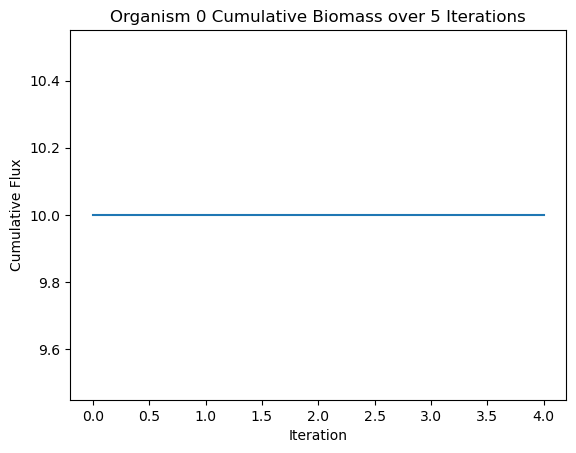

In [ ]:
#plot model results
ax = iifba.iifba_vis(org_flux.loc[0, :]["BiomassOrg1"]) # 0 -> organism 0, biomass reaction, all iterations

ax.set_title(f"Organism 0 Cumulative Biomass over {community.iters} Iterations")

# compared to cobrapy FBA
for ex, flux in media.items():
	model[0].exchanges.get_by_id(ex).lower_bound = flux
print("Model FBA Objective:  ", model[0].optimize().objective_value) # model is a cobra.Model - No need to import cobra
print("Model iiFBA Objective:", org_flux.loc[0, :]["BiomassOrg1"].sum())

## Simulation 2: Single Organism with More Complexity
Insert Diagram

In [ ]:
import iifba

# load models and media:
model, media = iifba.utils.load_simple_models(2) # sim. 2

# initialize community
community = iifba.Community(model, media, 
							iters=5, 
							objective="pfba",
							early_stop=True,
							v=True)
# run iterations
media_flux, org_flux = community.iifba() # you can also change some of the above parameters here



Iteration: 0
Running FBA for model 1/1...
Iteration: 1
Running FBA for model 1/1...
Convergence achieved.


Model FBA Objective:   20.0
Model iiFBA Objective: 20.0


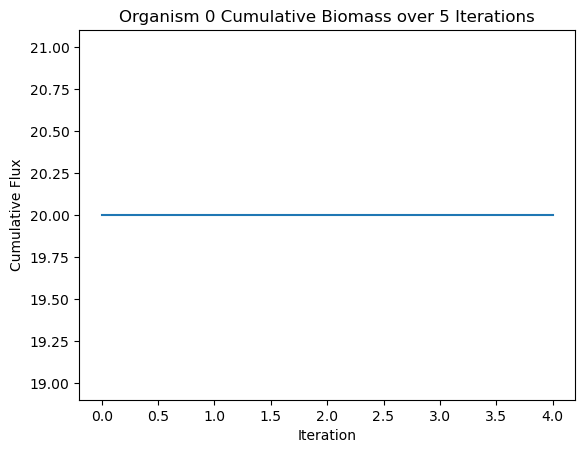

In [ ]:
#plot model results
ax = iifba.iifba_vis(org_flux.loc[0, :]["exchangeBio1"]) # 0 -> organism 0, biomass reaction, all iterations

ax.set_title(f"Organism 0 Cumulative Biomass over {community.iters} Iterations")

# compared to cobrapy FBA
for ex, flux in media.items():
	model[0].exchanges.get_by_id(ex).lower_bound = flux
print("Model FBA Objective:  ", model[0].optimize().objective_value)
print("Model iiFBA Objective:", org_flux.loc[0, :]["exchangeBio1"].sum())

## Simulation 3: Non-interacting Community with 2 Organisms
Insert Diagram

In [ ]:
import iifba

# load models and media:
models, media = iifba.utils.load_simple_models(3) # sim. 3

# initialize community
community = iifba.Community(models, media, 
							iters=5,
							objective="pfba",
							early_stop=True,
							v=True)
# run iterations
media_flux, org_flux = community.iifba() # you can also change some of the above parameters here



Iteration: 0
Running FBA for model 1/2...
Running FBA for model 2/2...
Iteration: 1
Running FBA for model 1/2...
Running FBA for model 2/2...
Convergence achieved.


Model 0 FBA Objective:   10.0
Model 0 iiFBA Objective: 10.0

Model 1 FBA Objective:   10.0
Model 1 iiFBA Objective: 10.0


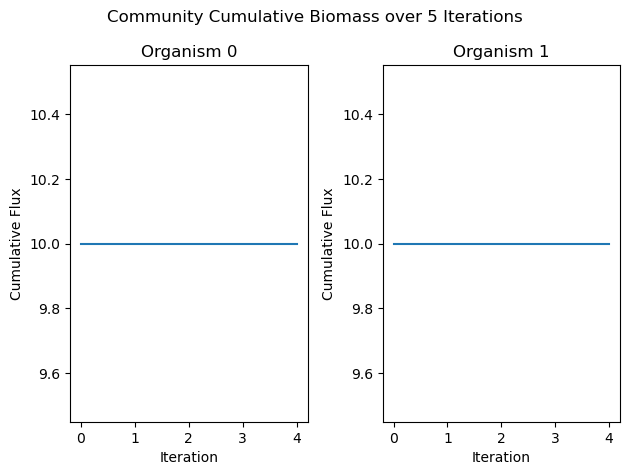

In [ ]:
import matplotlib.pyplot as plt

#plot model results
fig, ax = plt.subplots(1,2)
ax[0] = iifba.iifba_vis(org_flux.loc[0, :]["exchangeBio1"], ax=ax[0])
ax[1] = iifba.iifba_vis(org_flux.loc[1, :]["exchangeBio2"], ax=ax[1])

# set titles for readability
ax[0].set_title(f"Organism 0")
ax[1].set_title(f"Organism 1")
fig.suptitle(f"Community Cumulative Biomass over {community.iters} Iterations")
fig.tight_layout()

# compared to cobrapy FBA
for ex, flux in media.items():
	if ex in models[0].exchanges:
		models[0].exchanges.get_by_id(ex).lower_bound = flux
print("Model 0 FBA Objective:  ", models[0].optimize().objective_value)
print("Model 0 iiFBA Objective:", org_flux.loc[0, :]["exchangeBio1"].sum())

for ex, flux in media.items():
	if ex in models[1].exchanges:
		models[1].exchanges.get_by_id(ex).lower_bound = flux
print("\nModel 1 FBA Objective:  ", models[1].optimize().objective_value)
print("Model 1 iiFBA Objective:", org_flux.loc[1, :]["exchangeBio2"].sum())

## Simulation 4: Simple Competition
insert diagram

In [ ]:
import iifba

# load models and media:
models, media = iifba.utils.load_simple_models(4) # sim. 4

# initialize community
community = iifba.Community(models, media, 
							iters=5,
							objective="pfba",
							early_stop=True,
							v=True)
# run iterations
media_flux, org_flux = community.iifba() # you can also change some of the above parameters here



Iteration: 0
Running FBA for model 1/2...
Running FBA for model 2/2...
Re-running Optimization due to over-saturation of environment fluxes.
Running FBA for model 1/2...
Running FBA for model 2/2...
Iteration: 1
Running FBA for model 1/2...
Running FBA for model 2/2...
Convergence achieved.


If both models are optimized to consume a metabolite, there is a chance more metabolite will be taken up than is available. This is called the overshoot, which is the ratio of total consumed flux of metabolites to available flux in the media. If any overshoot variable is greater than 1, then more metabolite was consumed than is available. In this case, the algorithm will adjust all lower bounds relative to the metabolite with the maximum uptake. The adjustment factor follows:<br>


$lb_j = \frac{V_{i, j} f_{n, j}}{\sum_i a_i V_{i, j^*}}$
 
 **Variables**:
 > - $lb_j$ : Lower Bound for Exchange of Metabolite $j$
 > - $j^* = \arg \max_j OS_j$ : Metabolite of Maximum Overshoot
 > - $OS_j = \frac{\sum_i V_{i,j}}{f_{n, j}}$ : Overshoot Factor

Model 0 FBA Objective:   10.0
Model 0 iiFBA Objective: 5.0

Model 1 FBA Objective:   10.0
Model 1 iiFBA Objective: 5.0


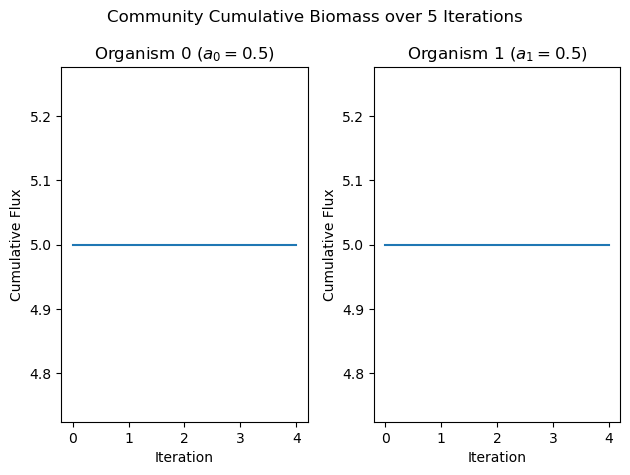

In [ ]:
import matplotlib.pyplot as plt

#plot model results
fig, ax = plt.subplots(1,2)
ax[0] = iifba.iifba_vis(org_flux.loc[0, :]["exchangeBio1"], ax=ax[0])
ax[1] = iifba.iifba_vis(org_flux.loc[1, :]["exchangeBio2"], ax=ax[1])

# set titles for readability
ax[0].set_title(f"Organism 0 ($a_0 = 0.5$)")
ax[1].set_title(f"Organism 1 ($a_1 = 0.5$)")
fig.suptitle(f"Community Cumulative Biomass over {community.iters} Iterations")
fig.tight_layout()

# compared to cobrapy FBA
for ex, flux in media.items():
	if ex in models[0].exchanges:
		models[0].exchanges.get_by_id(ex).lower_bound = flux
print("Model 0 FBA Objective:  ", models[0].optimize().objective_value)
print("Model 0 iiFBA Objective:", org_flux.loc[0, :]["exchangeBio1"].sum())

for ex, flux in media.items():
	if ex in models[1].exchanges:
		models[1].exchanges.get_by_id(ex).lower_bound = flux
print("\nModel 1 FBA Objective:  ", models[1].optimize().objective_value)
print("Model 1 iiFBA Objective:", org_flux.loc[1, :]["exchangeBio2"].sum())

Simple FBA, cannot handle community interactions, without modification (compartmentalized FBA).

### Varying Relative Abundance:
Now we can adjust the relative abundance of the community and see the difference

In [ ]:
import iifba

# load models and media:
models, media = iifba.utils.load_simple_models(4) # sim. 4

# initialize community
community = iifba.Community(models, media, 
							iters=5,
							rel_abund=[0.2, 0.8],  # relative abundances of each organism
							objective="pfba",
							early_stop=True,
							v=True)
# run iterations
media_flux, org_flux = community.iifba() # you can also change some of the above parameters here



Iteration: 0
Running FBA for model 1/2...
Running FBA for model 2/2...
Re-running Optimization due to over-saturation of environment fluxes.
Running FBA for model 1/2...
Running FBA for model 2/2...
Iteration: 1
Running FBA for model 1/2...
Running FBA for model 2/2...
Convergence achieved.


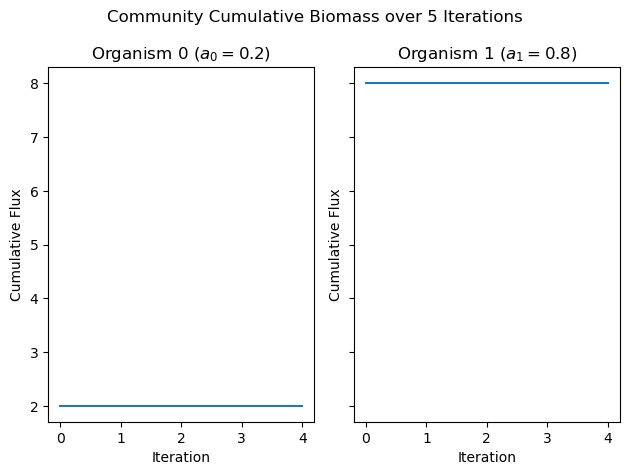

In [11]:
import matplotlib.pyplot as plt

#plot model results
fig, ax = plt.subplots(1,2, sharey=True)
ax[0] = iifba.iifba_vis(org_flux.loc[0, :]["exchangeBio1"], ax=ax[0])
ax[1] = iifba.iifba_vis(org_flux.loc[1, :]["exchangeBio2"], ax=ax[1])

# set titles for readability
ax[0].set_title(f"Organism 0 ($a_0 = 0.2$)")
ax[1].set_title(f"Organism 1 ($a_1 = 0.8$)")
fig.suptitle(f"Community Cumulative Biomass over {community.iters} Iterations")
fig.tight_layout()

We expect an organism with 4 times the abundance, to have an initial biomass flux that is 4 times its competitor.

# Simulation 5: Simple Cross-Feeding Between 2 Organisms
Insert Diagram

In [ ]:
import iifba

# load models and media:
models, media = iifba.utils.load_simple_models(5) # sim. 5

# initialize community
community = iifba.Community(models, media, 
							iters=5,
							objective="pfba",
							early_stop=True,
							v=True)
# run iterations
media_flux, org_flux = community.iifba() # you can also change some of the above parameters here



Iteration: 0
Running FBA for model 1/2...
Running FBA for model 2/2...
Iteration: 1
Running FBA for model 1/2...
Running FBA for model 2/2...
Iteration: 2
Running FBA for model 1/2...
Running FBA for model 2/2...
Convergence achieved.


Model 0 FBA Objective:   10.0
Model 0 iiFBA Objective: 20.0

Model 1 FBA Objective:   10.0
Model 1 iiFBA Objective: 10.0


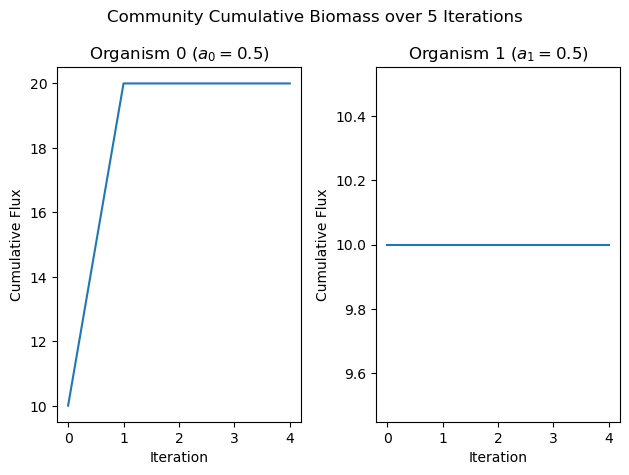

In [ ]:
import matplotlib.pyplot as plt

#plot model results
fig, ax = plt.subplots(1,2)
ax[0] = iifba.iifba_vis(org_flux.loc[0, :]["exchangeBio1"], ax=ax[0])
ax[1] = iifba.iifba_vis(org_flux.loc[1, :]["exchangeBio2"], ax=ax[1])

# set titles for readability
ax[0].set_title(f"Organism 0 ($a_0 = 0.5$)")
ax[1].set_title(f"Organism 1 ($a_1 = 0.5$)")
fig.suptitle(f"Community Cumulative Biomass over {community.iters} Iterations")
fig.tight_layout()

# compared to cobrapy FBA
for ex, flux in media.items():
	if ex in models[0].exchanges:
		models[0].exchanges.get_by_id(ex).lower_bound = flux
print("Model 0 FBA Objective:  ", models[0].optimize().objective_value)
print("Model 0 iiFBA Objective:", org_flux.loc[0, :]["exchangeBio1"].sum())

for ex, flux in media.items():
	if ex in models[1].exchanges:
		models[1].exchanges.get_by_id(ex).lower_bound = flux
print("\nModel 1 FBA Objective:  ", models[1].optimize().objective_value)
print("Model 1 iiFBA Objective:", org_flux.loc[1, :]["exchangeBio2"].sum())

Notice that end behavior matches between:
- Simulation 5, Organism 0 & Simulation 2
- Simulation 5, Organism 1 & Simulation 1

## Simulation 6: Multi-Step Cross-Feeding
Insert Diagram

In [ ]:
import iifba

# load models and media:
models, media = iifba.utils.load_simple_models(6) # sim. 6

# initialize community
community = iifba.Community(models, media, 
							iters=5,
							objective="pfba",
							early_stop=True,
							v=True)
# run iterations
media_flux, org_flux = community.iifba() # you can also change some of the above parameters here


Iteration: 0
Running FBA for model 1/2...
Running FBA for model 2/2...
Iteration: 1
Running FBA for model 1/2...
Running FBA for model 2/2...
Iteration: 2
Running FBA for model 1/2...
Running FBA for model 2/2...
Iteration: 3
Running FBA for model 1/2...
Running FBA for model 2/2...
Iteration: 4
Running FBA for model 1/2...
Running FBA for model 2/2...
Convergence achieved.


Model 0 FBA Objective:   10.0
Model 0 iiFBA Objective: 20.0

Model 1 FBA Objective:   0.0
Model 1 iiFBA Objective: 20.0


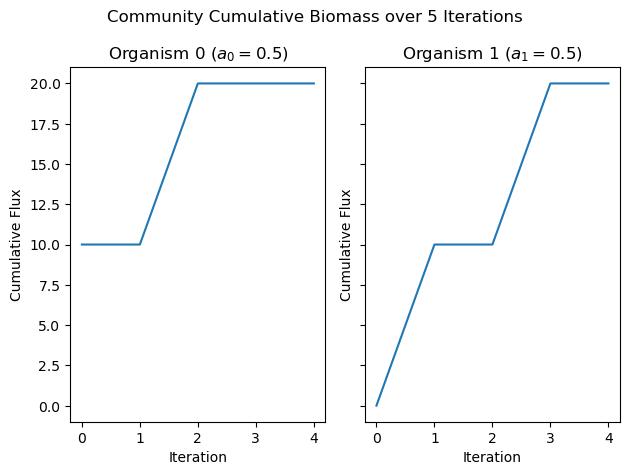

In [ ]:
import matplotlib.pyplot as plt

#plot model results
fig, ax = plt.subplots(1,2, sharey=True)
ax[0] = iifba.iifba_vis(org_flux.loc[0, :]["exchangeBio1"], ax=ax[0])
ax[1] = iifba.iifba_vis(org_flux.loc[1, :]["exchangeBio2"], ax=ax[1])

# set titles for readability
ax[0].set_title(f"Organism 0 ($a_0 = 0.5$)")
ax[1].set_title(f"Organism 1 ($a_1 = 0.5$)")
fig.suptitle(f"Community Cumulative Biomass over {community.iters} Iterations")
fig.tight_layout()

# compared to cobrapy FBA
for ex, flux in media.items():
	if ex in models[0].exchanges:
		models[0].exchanges.get_by_id(ex).lower_bound = flux
print("Model 0 FBA Objective:  ", models[0].optimize().objective_value)
print("Model 0 iiFBA Objective:", org_flux.loc[0, :]["exchangeBio1"].sum())

for ex, flux in media.items():
	if ex in models[1].exchanges:
		models[1].exchanges.get_by_id(ex).lower_bound = flux
print("\nModel 1 FBA Objective:  ", models[1].optimize().objective_value)
print("Model 1 iiFBA Objective:", org_flux.loc[1, :]["exchangeBio2"].sum())

Notice, more iterations are required for convergence. This is evident in Simulation 5, but made more clear in Simulation 6. This is due to metabolites being added/returned to the media for cross-feeding after each iteration. Additionally, this emergent iteraction is not picked up by normal FBA.


## Simulation 7: Cross-Feeding & Competition Between 2 Organisms
Insert Diagram

In [ ]:
import iifba

# load models and media:
models, media = iifba.utils.load_simple_models(7) # sim. 7

# initialize community
community = iifba.Community(models, media, 
							iters=5,
							objective="pfba",
							early_stop=True,
							v=True)
# run iterations
media_flux, org_flux = community.iifba() # you can also change some of the above parameters here


Iteration: 0
Running FBA for model 1/2...
Running FBA for model 2/2...
Re-running Optimization due to over-saturation of environment fluxes.
Running FBA for model 1/2...
Running FBA for model 2/2...
Iteration: 1
Running FBA for model 1/2...
Running FBA for model 2/2...
Iteration: 2
Running FBA for model 1/2...
Running FBA for model 2/2...
Convergence achieved.


Model 0 FBA Objective:   10.0
Model 0 iiFBA Objective: 5.0

Model 1 FBA Objective:   10.0
Model 1 iiFBA Objective: 10.0


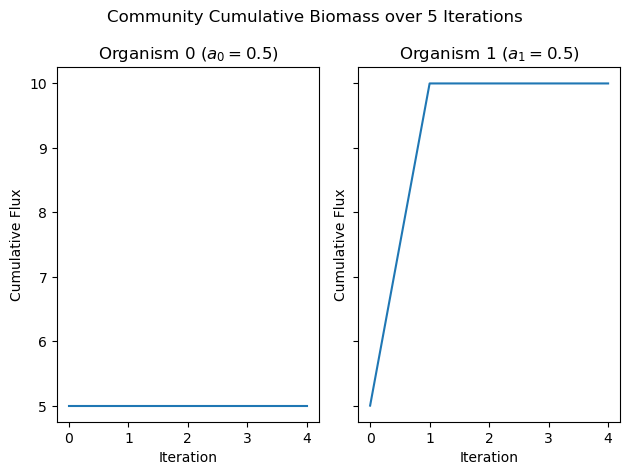

In [ ]:
import matplotlib.pyplot as plt

#plot model results
fig, ax = plt.subplots(1,2, sharey=True)
ax[0] = iifba.iifba_vis(org_flux.loc[0, :]["exchangeBio1"], ax=ax[0])
ax[1] = iifba.iifba_vis(org_flux.loc[1, :]["exchangeBio2"], ax=ax[1])

# set titles for readability
ax[0].set_title(f"Organism 0 ($a_0 = 0.5$)")
ax[1].set_title(f"Organism 1 ($a_1 = 0.5$)")
fig.suptitle(f"Community Cumulative Biomass over {community.iters} Iterations")
fig.tight_layout()

# compared to cobrapy FBA
for ex, flux in media.items():
	if ex in models[0].exchanges:
		models[0].exchanges.get_by_id(ex).lower_bound = flux
print("Model 0 FBA Objective:  ", models[0].optimize().objective_value)
print("Model 0 iiFBA Objective:", org_flux.loc[0, :]["exchangeBio1"].sum())

for ex, flux in media.items():
	if ex in models[1].exchanges:
		models[1].exchanges.get_by_id(ex).lower_bound = flux
print("\nModel 1 FBA Objective:  ", models[1].optimize().objective_value)
print("Model 1 iiFBA Objective:", org_flux.loc[1, :]["exchangeBio2"].sum())

# Real-Life Examples
The following examples utilize AGORA2 models to understand how growth compares. These examples will also show how to use the summary class/method for analyzing the community. 

## Example 1: Pairwise Interactions
- Escherichia coli str. K12 substr. MG1655 & Bacterioides thetaiotaomicron 3731
	- [Download Escherichia_coli_str_K_12_substr_MG1655.mat Here](https://www.vmh.life/files/reconstructions/AGORA2/version2.01/mat_files/individual_reconstructions/Escherichia_coli_str_K_12_substr_MG1655.mat)
	- [Download Bacteroides_thetaiotaomicron_3731.mat Here](https://www.vmh.life/files/reconstructions/AGORA2/version2.01/mat_files/individual_reconstructions/Bacteroides_thetaiotaomicron_3731.mat)

In [1]:
import cobra as cb
import iifba

EC_path = "AGORA2_Models/Escherichia_coli_str_K_12_substr_MG1655.mat"
EC = cb.io.load_matlab_model(EC_path)

BT_path = "AGORA2_Models/Bacteroides_thetaiotaomicron_3731.mat"
BT = cb.io.load_matlab_model(BT_path)

#example glucose minimal media
min_med_ids_ex = ['EX_glc_D(e)','EX_so4(e)','EX_nh4(e)','EX_no3(e)','EX_pi(e)','EX_cys_L(e)',
			'EX_mn2(e)','EX_cl(e)','EX_ca2(e)','EX_mg2(e)','EX_cu2(e)','EX_cobalt2(e)','EX_fe2(e)','EX_fe3(e)','EX_zn2(e)','EX_k(e)']
# Define medium uptake flux bounds
min_med_fluxes_ex = [-10,-100,-100,-100,-100,-100,
					-100,-100,-100,-100,-100,-100,-100,-100,-100,-100]
media = dict(zip(min_med_ids_ex, min_med_fluxes_ex))

# initialize community
community = iifba.Community([EC, BT], media, 
							iters=5,
							objective="pfba",
							early_stop=True,
							v=True)
# run iterations
media_flux, org_flux = community.iifba() # you can also change some of the above parameters here


Set parameter Username
Set parameter LicenseID to value 2684253
Academic license - for non-commercial use only - expires 2026-07-02


No defined compartments in model model. Compartments will be deduced heuristically using regular expressions.
Using regular expression found the following compartments:c, e, p
No defined compartments in model model. Compartments will be deduced heuristically using regular expressions.
Using regular expression found the following compartments:c, e, p


Iteration: 0
Running FBA for model 1/2...
Running FBA for model 2/2...
(2, 665)
()
(2,)
Re-running Optimization due to over-saturation of environment fluxes.
Running FBA for model 1/2...
Running FBA for model 2/2...
Iteration: 1
Running FBA for model 1/2...
Running FBA for model 2/2...
Iteration: 2
Running FBA for model 1/2...
Running FBA for model 2/2...
Convergence achieved.


In [1]:
import cobra as cb
import iifba

EC_path = "AGORA2_Models/Escherichia_coli_str_K_12_substr_MG1655.mat"
EC = cb.io.load_matlab_model(EC_path)

BT_path = "AGORA2_Models/Bacteroides_thetaiotaomicron_3731.mat"
BT = cb.io.load_matlab_model(BT_path)

#example glucose minimal media
min_med_ids_ex = ['EX_glc_D(e)','EX_so4(e)','EX_nh4(e)','EX_no3(e)','EX_pi(e)','EX_cys_L(e)',
			'EX_mn2(e)','EX_cl(e)','EX_ca2(e)','EX_mg2(e)','EX_cu2(e)','EX_cobalt2(e)','EX_fe2(e)','EX_fe3(e)','EX_zn2(e)','EX_k(e)']
# Define medium uptake flux bounds
min_med_fluxes_ex = [-10,-100,-100,-100,-100,-100,
					-100,-100,-100,-100,-100,-100,-100,-100,-100,-100]
media = dict(zip(min_med_ids_ex, min_med_fluxes_ex))

# initialize community
community = iifba.iifbaObject([EC, BT], media, rel_abund=[0.5, 0.5])
# run iterations
media_flux, org_flux = community.run_iifba(iters=5, method="pfba", early_stop=True, v=True)


Set parameter Username
Set parameter LicenseID to value 2684253
Academic license - for non-commercial use only - expires 2026-07-02


No defined compartments in model model. Compartments will be deduced heuristically using regular expressions.
Using regular expression found the following compartments:c, e, p
No defined compartments in model model. Compartments will be deduced heuristically using regular expressions.
Using regular expression found the following compartments:c, e, p


Iteration: 0
 Simulating model: 1  of  2
 Simulating model: 2  of  2
Re-running Optimization due to over-saturation of environment fluxes.
 Simulating model: 1  of  2
 Simulating model: 2  of  2
Iteration: 1
 Simulating model: 1  of  2
 Simulating model: 2  of  2
Iteration: 2
 Simulating model: 1  of  2
 Simulating model: 2  of  2
Iteration: 3
 Simulating model: 1  of  2
 Simulating model: 2  of  2
Iteration: 4
 Simulating model: 1  of  2
 Simulating model: 2  of  2


ValueError: setting an array element with a sequence.

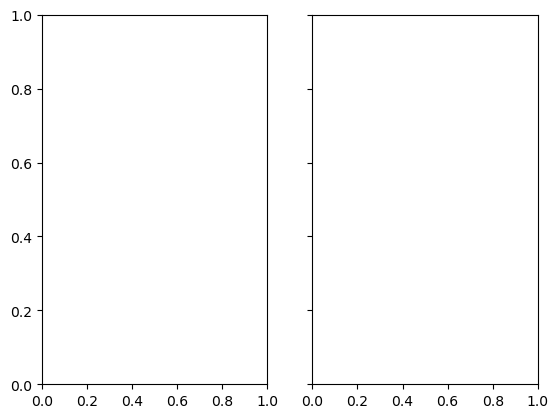

In [ ]:
# V:,j* x fn,j* /V:,j*@ a
import matplotlib.pyplot as plt

#plot model results
fig, ax = plt.subplots(1,2, sharey=True)
print(org_flux.loc[0, :]["biomass525"])
ax[0] = iifba.iifba_vis(org_flux.loc[0, :]["biomass525"], ax=ax[0])
ax[1] = iifba.iifba_vis(org_flux.loc[1, :]["bio1"], ax=ax[1])

# set titles for readability
ax[0].set_title(f"E. coli ($a_0 = 0.5$)")
ax[1].set_title(f"B. theta ($a_1 = 0.5$)")
fig.suptitle(f"Community Cumulative Biomass over {community.iters} Iterations")
fig.tight_layout()

# compared to cobrapy FBA
for ex, flux in media.items():
	if ex in EC.exchanges:
		EC.exchanges.get_by_id(ex).lower_bound = flux
print("E. coli FBA Objective:  ", EC.optimize().objective_value)
print("E. coli iiFBA Objective:", org_flux.loc[0, :]["biomass525"].sum())

for ex, flux in media.items():
	if ex in BT.exchanges:
		BT.exchanges.get_by_id(ex).lower_bound = flux
print("\nB. theta FBA Objective:  ", BT.optimize().objective_value)
print("B. theta iiFBA Objective:", org_flux.loc[1, :]["bio1"].sum())

E. coli FBA Objective:   0.8392045141337162
E. coli iiFBA Objective: 0.5733021129966583

B. theta FBA Objective:   0.4323215840114494
B. theta iiFBA Objective: 0.19208879946685267


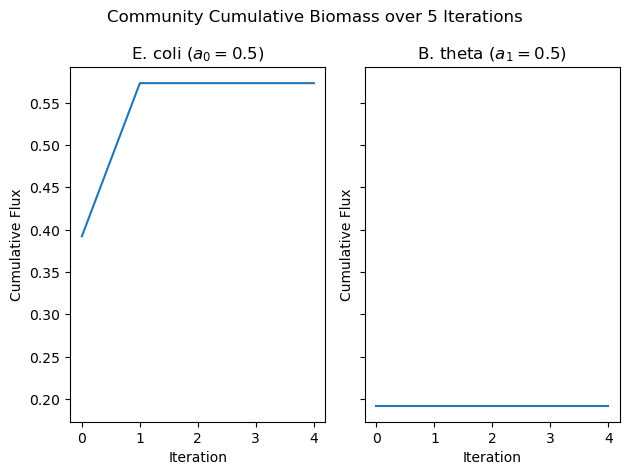

In [2]:
# V:,j@ fn,j* /V:,j*@ a
import matplotlib.pyplot as plt

#plot model results
fig, ax = plt.subplots(1,2, sharey=True)
ax[0] = iifba.iifba_vis(org_flux.loc[0, :]["biomass525"], ax=ax[0])
ax[1] = iifba.iifba_vis(org_flux.loc[1, :]["bio1"], ax=ax[1])

# set titles for readability
ax[0].set_title(f"E. coli ($a_0 = 0.5$)")
ax[1].set_title(f"B. theta ($a_1 = 0.5$)")
fig.suptitle(f"Community Cumulative Biomass over {community.iters} Iterations")
fig.tight_layout()

# compared to cobrapy FBA
for ex, flux in media.items():
	if ex in EC.exchanges:
		EC.exchanges.get_by_id(ex).lower_bound = flux
print("E. coli FBA Objective:  ", EC.optimize().objective_value)
print("E. coli iiFBA Objective:", org_flux.loc[0, :]["biomass525"].sum())

for ex, flux in media.items():
	if ex in BT.exchanges:
		BT.exchanges.get_by_id(ex).lower_bound = flux
print("\nB. theta FBA Objective:  ", BT.optimize().objective_value)
print("B. theta iiFBA Objective:", org_flux.loc[1, :]["bio1"].sum())

E. coli FBA Objective:   0.8392045141337162
E. coli iiFBA Objective: 0.5733021129966294

B. theta FBA Objective:   0.43232158401144327
B. theta iiFBA Objective: 0.1920887994668511


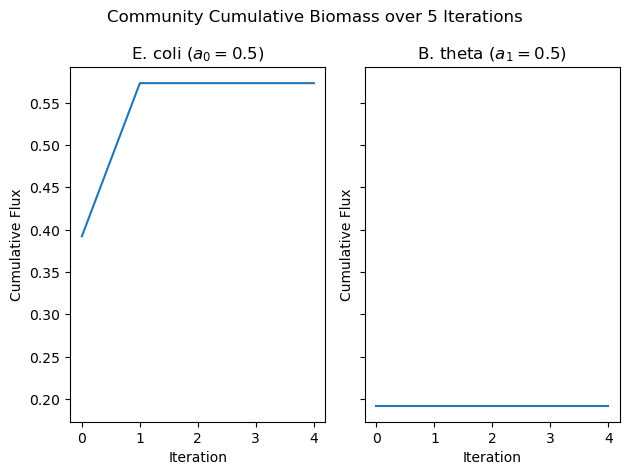

In [ ]:
# V:,j* fn,j /V:,j*@ a
import matplotlib.pyplot as plt

#plot model results
fig, ax = plt.subplots(1,2, sharey=True)
ax[0] = iifba.iifba_vis(org_flux.loc[0, :]["biomass525"], ax=ax[0])
ax[1] = iifba.iifba_vis(org_flux.loc[1, :]["bio1"], ax=ax[1])

# set titles for readability
ax[0].set_title(f"E. coli ($a_0 = 0.5$)")
ax[1].set_title(f"B. theta ($a_1 = 0.5$)")
fig.suptitle(f"Community Cumulative Biomass over {community.iters} Iterations")
fig.tight_layout()

# compared to cobrapy FBA
for ex, flux in media.items():
	if ex in EC.exchanges:
		EC.exchanges.get_by_id(ex).lower_bound = flux
print("E. coli FBA Objective:  ", EC.optimize().objective_value)
print("E. coli iiFBA Objective:", org_flux.loc[0, :]["biomass525"].sum())

for ex, flux in media.items():
	if ex in BT.exchanges:
		BT.exchanges.get_by_id(ex).lower_bound = flux
print("\nB. theta FBA Objective:  ", BT.optimize().objective_value)
print("B. theta iiFBA Objective:", org_flux.loc[1, :]["bio1"].sum())

### Community Summary

The Summary Class, made with Community.summary(...) generates a summary table output similar to cobra. The community summary will generate one Uptake/Secretion Subsection for the Community together, then one for each model in the community.

Community: Class representation for an iteration of an iiFBA community

`class iifba.summary.Summary(community:[iifba.Community], iter_shown: Optional[int, None] = None, element: Optional[str] = "C")`<br>
> Class representation for an iteration of an iiFBA community<br><br>

> **Parameters** <br>
> - **Community**(*iifba.Community*) - iifba Community object. If iiFBA has not been run, summary will be generated, but iifba.Community attributes are initialized with zeros, so no significant data will be shown until running `community.iifba()`
> - **iter_shown**(*int, None, optional*) - Iteration to summarize. Defaults to None. If None, the last iteration will be summarized and displayed.
> - **element**(*str,  optional*) - Element to evaluate with summary. Modified from cobrapy summary, will display the flux and percents of the given element. Default element is 'C' for Carbon.

> **Attributes**<br>
> - will go back and edit this
> -
>

> **Methods**<br>
> - will go back and edit this
> -


In [5]:
# generate community summary
community.summary()

Metabolite,Exchange,Flux,C-Number,C-Flux
so4[e],EX_so4(e),0.165017,0,0.00%
fe2[e],EX_fe2(e),0.009052,0,0.00%
cys_L[e],EX_cys_L(e),0.040368,3,0.14%
pi[e],EX_pi(e),0.904874,0,0.00%
glc_D[e],EX_glc_D(e),10.000000,6,70.52%
nh4[e],EX_nh4(e),10.270851,0,0.00%
mn2[e],EX_mn2(e),0.006002,0,0.00%
cobalt2[e],EX_cobalt2(e),0.006002,0,0.00%
cu2[e],EX_cu2(e),0.006002,0,0.00%
fe3[e],EX_fe3(e),0.006002,0,0.00%


## Example 2: Larger Community Interactions
The following community comes from [Negative interactions determine Clostridioides difficile growth in synthetic human gut communities](https://www.embopress.org/doi/full/10.15252/msb.202110355#msb202110355-sup-0006)
Figure 3B Displays CommI has the lowest C. difficile abundance and with the lowest richness. This is a great example for demonstrating how iiFBA can show community interactions on communities with more than 2 organisms. CommI composition is detailed in the Data availability section.

To simplify computation and download requirements, the Virtual Metabolic Human ([VMH](vmh.life)) European Diet will be used. The following are models for download:
| Name | Details | Link|
|:----:|:-------:|:---:|
|*Clostridium difficile* (*C. diff* or CD)| *C. diff* ribotype 027 is known as hypervirulent | [Download *C. diff* Model Here](https://www.vmh.life/files/reconstructions/AGORA2/version2.01/mat_files/individual_reconstructions/Clostridium_difficile_R20291.mat)|
|*Clostridium hiranonis* (*C. hiranonis* or CD)| *C. hiranonis* is a *C. diff* competitor | [Download *C. hiranonis* Model Here](https://www.vmh.life/files/reconstructions/AGORA2/version2.01/mat_files/individual_reconstructions/Clostridium_hiranonis_TO_931_DSM_13275.mat)|
|*Eggerthela lenta* (*E. lenta* or EL)| *E. lenta* is known to promote growth of other bacteria | [Download *E. lenta* Model Here](https://www.vmh.life/files/reconstructions/AGORA2/version2.01/mat_files/individual_reconstructions/Eggerthella_lenta_DSM_11767.mat)|
|*Bacteroides thetaiotaomicron* (*B. theta* or BT) | Known to compete with *C. diff*. Same model as Above Community|[Download *B. theta* Model Here](https://www.vmh.life/files/reconstructions/AGORA2/version2.01/mat_files/individual_reconstructions/Bacteroides_thetaiotaomicron_3731.mat)|


In [1]:
import cobra as cb

# load models
CD_path = "AGORA2_Models/Clostridium_difficile_R20291.mat"
CD = cb.io.load_matlab_model(CD_path)

CH_path = "AGORA2_Models/Clostridium_hiranonis_TO_931_DSM_13275.mat"
CH = cb.io.load_matlab_model(CH_path)

BT_path = "AGORA2_Models/Bacteroides_thetaiotaomicron_3731.mat"
BT = cb.io.load_matlab_model(BT_path)

EL_path = "AGORA2_Models/Eggerthella_lenta_DSM_11767.mat"
EL = cb.io.load_matlab_model(EL_path)



Set parameter Username
Set parameter LicenseID to value 2684253
Academic license - for non-commercial use only - expires 2026-07-02


No defined compartments in model model. Compartments will be deduced heuristically using regular expressions.
Using regular expression found the following compartments:c, e
No defined compartments in model model. Compartments will be deduced heuristically using regular expressions.
Using regular expression found the following compartments:c, e
No defined compartments in model model. Compartments will be deduced heuristically using regular expressions.
Using regular expression found the following compartments:c, e, p
No defined compartments in model model. Compartments will be deduced heuristically using regular expressions.
Using regular expression found the following compartments:c, e


In [2]:
import iifba
from matplotlib import pyplot as plt

# # initialize community
community = iifba.Community([CD, CH, BT, EL], media=.1, # minimal media
							iters=5, rel_abund=[0.1, 0.3, 0.3, 0.3], # unequal similar to Hromada et al.
							objective="pfba",
							early_stop=True,
							v=True)

# # run iterations
media_flux, org_flux = community.iifba() # you can also change some of the above parameters here

#plot model results
fig, ax = plt.subplots(2,2, sharey=True, sharex=True)
ax[0, 0] = iifba.iifba_vis(org_flux.loc[0, :]["EX_biomass(e)"], ax=ax[0, 0])
ax[0, 1] = iifba.iifba_vis(org_flux.loc[1, :]["EX_biomass(e)"], ax=ax[0, 1])
ax[1, 0] = iifba.iifba_vis(org_flux.loc[2, :]["EX_biomass(e)"], ax=ax[1, 0])
ax[1, 1] = iifba.iifba_vis(org_flux.loc[3, :]["EX_biomass(e)"], ax=ax[1, 1])

# set titles for readability
ax[0, 0].set_title(f"C. diff ($a_0 = 0.1$)")
ax[0, 1].set_title(f"C. hiranonis ($a_1 = 0.3$)")
ax[1, 0].set_title(f"B. theta ($a_2 = 0.3$)")
ax[1, 1].set_title(f"E. lenta ($a_3 = 0.3$)")
fig.suptitle(f"Community Cumulative Biomass over {community.iters} Iterations")
fig.tight_layout()



Iteration: 0
Running FBA for model 1/4...
Running FBA for model 2/4...
Running FBA for model 3/4...
Running FBA for model 4/4...
EX_trp_L(e) over-consumed by : [3.84379136]
fnij*: 0.0055157
V'nij*: [-0.0054496 -0.0055157 -0.0055157 -0.0047202]
fnij* dot V'nij*: [-3.00583587e-05 -3.04229465e-05 -3.04229465e-05 -2.60352071e-05]
V*nij*: [0.055157   0.01838567 0.01838567 0.01838567]
V*nij*: [0.0057032  0.00577237 0.00577237 0.00493985]
Re-running Optimization due to over-saturation of environment fluxes.
Running FBA for model 1/4...
Running FBA for model 2/4...
Running FBA for model 3/4...
Running FBA for model 4/4...
EX_cu2(e) over-consumed by : [2.4312533]
fnij*: 0.00079397
V'nij*: [-7.93970000e-04 -2.45184316e-04 -7.93970000e-04 -9.72178701e-05]
fnij* dot V'nij*: [-6.30388361e-07 -1.94668992e-07 -6.30388361e-07 -7.71880724e-08]
V*nij*: [0.0079397  0.00264657 0.00264657 0.00264657]
V*nij*: [0.00149982 0.00046316 0.00149982 0.00018365]
Re-running Optimization due to over-saturation of env

KeyboardInterrupt: 

In [3]:
community.env_fluxes

,,EX_chlphncl(e),EX_val_L(e),EX_mops(e),EX_cu2(e),EX_isobut(e),EX_succ(e),EX_urea(e),EX_r406(e),EX_hspg_degr_1(e),EX_strch2(e),...,EX_12dgr180(e),EX_cspg_c(e),EX_cholate(e),EX_aso4(e),EX_gsn(e),EX_cytd(e),EX_asn_L(e),EX_hspg_degr_15(e),EX_acgal(e),EX_h2s(e)
Iteration,Run,,,,,,,,,,,,,,,,,,,,,
0,0,0.0,0.041160,0.0,0.000794,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.009366,2.043409,0.0,0.0,0.0,0.0
1,0,0.0,0.005372,0.0,0.000037,0.0,0.199051,0.023767,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.009366,1.744816,0.0,0.0,0.0,0.0
2,0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
3,0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
4,0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
5,0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0


In [3]:
summ = community.summarize()
summ.to_cytoscape()

ValueError: Length mismatch: Expected axis has 329 elements, new values have 2 elements

Cytoscape Uses Fluxes, 
Table Format:
Use headers: source, target, type, value
organism, metabolite, uptake/secretion, |flux value|